# Introduction to the Finite Element Method (FEM)

####*Marco Lúcio Bittencourt* (mlb@fem.unicamp.br) and *Cláudio Alessandro de Carvalho Silva* (cacs@thorus-scisoft.com.br)

In the previous classes, we looked into the Finite Difference Method (FDM) and the Finite Volume Method (FVM). Now, we will introduce a numerical method called the Finite Element Method (FEM).

In our discusssion about the Finite Element Method, we will deal with the 1-D steady state diffusion equation, present in several engineering applications. In Heat Transfer, it describes steady state conduction. In Structural Engineering, that is the equation of deformation of axially loaded bars.

## The Finite Element Method (FEM)

- The FEM is a numerical procedure for the determination of approximate solution for Boundary Value Problems (BVP).
- The **strong form** of a BVP corresponds to the differential equation plus the boundary conditions of the problem at hand.
- A solution of the strong form is also a solution of the integral form of the BVP or **weak form**.
- In a **weak formulation**, an equation is no longer required to hold absolutely and has instead *weak solutions*. Integrating the weak form by parts (applying the divergence theorem by Gauss or Green’s formula) provides the numerical benefit of reduced differentiation order.
- Using FEM  we are able to obtain an approximate solution of the **weak form** associated to the BVP.
- The approximate solution consists of a linear combination of interpolation polynomial functions.
- There are different versions of FEM according to the type of interpolation functions used.


<figure>
<img src="figs/refin-modif.png" alt="FEM versions" width="497" height="407">
</figure>
####*h* and *p* refinements.

## Equations for Axially Loaded Bars: Strong Formulation

<figure>
<img src="figs/barra_esforcos.png" alt="Bar loads" width="720" height="227">
</figure>
####Axially loaded bar.

The static equilibrium principle leads to a BVP in terms of the normal force:
\begin{equation}
\left\{ \begin{array}{l}
\frac{dN_x(x)}{dx} = -q_x(x)\\
N_x(x=0)=-P_0\\
N_x(x=L)=P_L
\end{array}\right.
\end{equation}

The classic cinematic assumption for axially loaded bars composed by linear material and subjected to small displacements and strains (plane sections remain plane after loading) leads to the differential equation in terms of displacements for $x\in(0,L)$
\begin{equation}
\frac{d}{dx}\underbrace{\left(E(x)A(x)\frac{du_x(x)}{dx}\right)}_{N_x(x)} = -q_x(x)\;\;\;\;
%\frac{dN_x(x)}{dx} = -q_x(x)
EA\frac{du_x^2(x)}{dx^2}=-q_x(x)
\end{equation}
with kinematic and natural boundary conditions respectively in terms of $u_x(x)$ and $N_x(x)$. For the bar illustrated below we have
\begin{equation}
u_x(x=0) = 0 \;\;\;\;\mbox{ and }\;\;\;\; N_x(x=L)=P
\end{equation}

<table style="width:80%; border-style:hidden">
  <tr>
    <td style="border-style:hidden; text-align:center">![barra_modelo](figs/barra_modelo.png) <br><b>Cinematic and natural boundary conditions.</b> </td>	
  </tr>
</table>

## Example: Solving the Strong Formulation


Consider a bar subjected to a distributed constant axial load $q_x(x)=q_0$ and the boundary conditions shown in the following figure.

### ![barra_exemplo](figs/barra_exemplo.png)

A function $u_x(x)$ is called **strong solution** if it is defined for any $0\leq x \leq L$, has continuous derivatives up to second order (thus, $u_x(x)\in C^2[0,L]$) and is a solution of the BVP:

- Differential equation
    \begin{equation}
    EAu_x''(x)=-q_0
    \end{equation}
- Boundary conditions: $u_x(x=0)=0$ and $N_x(x=L)=P$.

####Integrating the differential equation:
1. First integration: normal force
    \begin{equation}
     N_x(x) = EAu_x'(x)=-q_0x+C_1
    \end{equation}
2. Second integration: axial displacement
    \begin{equation}
    EAu_x(x) = -\frac{q_0}{2}x^2+C_1x+C_2
    \end{equation}
3. Computing constants $C_1$ and $C_2$
    \begin{equation}
     N_x(x=L) = -(q_0)(L)+C_1=P\;\rightarrow\;C_1=P+q_oL
    \end{equation}
    \begin{equation}
    u_x(x=0) = \frac{1}{EA}\left[-\frac{q_0}{2}    (0)^2+C_1(0)+C_2\right]=0\;\rightarrow\;C_2=0
    \end{equation}

####Final solution
- Normal force
    \begin{equation}
    N_x(x) = -q_0(x-L)+P
    \end{equation}
- Axial displacement
    \begin{equation}
    u_x(x) = \frac{1}{EA}\left(-\frac{q_0}{2}x^2+(P+q_oL)x\right)
    \end{equation}
- Support reaction
    \begin{equation}
    R=-N_x(x=0)=-(P+q_oL)
    \end{equation}


<figure>
<img src="figs/barra_exemplo_reacao.png" alt="Bar loads" width="720" height="227">
</figure>

Let´s assume some numerical values and plot the solution:

In [3]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [8]:
L = 1    # length L=1m
q0=100   # Distributed load q0=100 N/m
P=200    # Normal force at the end of the bar.
nx=51    # 
x=numpy.linspace(0,L,nx)
N=-q0*(x-L)+P                 # Internal distribution of normal force
EAu=-(q0/2)*x**2+(P+q0*L)*x   # Displacement times EA

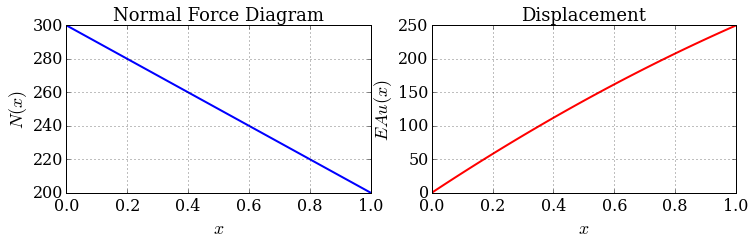

In [9]:
pyplot.figure(figsize=(12,3))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel(r'$x$', fontsize=18)
pyplot.ylabel(r'$N(x)$', fontsize=18)
pyplot.title('Normal Force Diagram', fontsize=18)
pyplot.plot(x,N, 'b-', lw=2);

pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel(r'$x$', fontsize=18)
pyplot.ylabel(r'$EAu(x)$', fontsize=18)
pyplot.title('Displacement', fontsize=18)
pyplot.plot(x,EAu, 'r-', lw=2);

## Equations for Axially Loaded Bars: Weak Formulation

Multiplying the diferential equation in terms of displacements by a test function $v_x(x)$ and integrating over the length of the bar, we obtain the statement
\begin{equation}
\int_0^L \frac{d}{dx}\left(E(x)A(x)\frac{du_x(x)}{dx}\right)v_x(x)dx = -\int_0^L q_x(x) v_x(x) dx
\end{equation}

Integrating the previous expression by parts, we have
\begin{equation}
-\int_0^L E(x)A(x)u_x'v_x'dx + \left.\underbrace{E(x)A(x)u_x'(x)}_{N_x(x)}v_x(x)\right|_0^L =
-\int_0^L q_x(x)v_x(x) dx
\end{equation}

and rearranging the terms
\begin{equation}
\int_0^L E(x)A(x)u_x'(x)v_x'(x)dx = \int_0^L q_x(x)v_x(x) dx + N_x(L)v_x(L) - N_x(0)v_x(0)
\end{equation}


Using the boundary conditions in terms of normal forces, we obtain
\begin{equation}
\int_0^L E(x)A(x)u_x'(x)v_x'(x)dx = \int_0^L q_x(x)v_x(x) dx + P_Lv_x(L) + P_0v_x(0)
\end{equation}

The expression above is a equilibrium integral equation involving only first order derivatives of $u_x(x)$ and $v_x(x)$. The ogirinal operator was thus "weakened" and then that expression is called **weak form** of the original BVP.

The test function $v_x(x)$ must satisfy the corresponding homogeneous boundary conditions. In the preceeding example: $v_x(0)=0$.

In FEM, the approximation $u_n$ of $u_x$ is obtained through a linear combination of global polynomial interpolation functions $\{\phi_j(x)\}_{j=1}^n$
\begin{equation}
u_x(x) \approx u_{n}(x) = \sum_{j=1}^n a_j\phi_j(x)\rightarrow
u_{n}'(x) = \sum_{j=1}^n a_j\phi_j'(x)
\end{equation}
where $a_j\;(j=1,\ldots,n)$ are the coefficients to be determined.

The same interpolation functions are used for $v_x(x)$ in the Galerkin method. Therefore,
\begin{equation}
v_x(x) \approx v_{n}(x) = \sum_{i=1}^n b_i\phi_i(x)\rightarrow
v_{n}'(x) = \sum_{i=1}^n b_i\phi_i'(x)
\end{equation}

Substituting both approximations in the weak form, we have
\begin{equation}
\sum_{i,j=1}^n \left[ \left( \int_0^L E(x)A(x)\phi_i'(x)\phi_j'(x) dx\right)a_j
- \int_0^L q_x\phi_i(x) dx - P_L\phi_i(L) - P_0\phi_i(0) \right] b_i = 0
\end{equation}

Note that the $b_i$ are arbitrary coefficients and then the term inside brackets in the previous expression must be null for all $i=1,\ldots,n$. In other words,
\begin{equation}
\sum_{j=1}^n\left( \underbrace{\int_0^L E(x)A(x)\phi_i'(x)\phi_j'(x)dx}_{K_{ij}}\right)a_j =
\underbrace{\int_0^L q_x(x)\phi_i(x) dx + P_L\phi_i(L) + P_0\phi_i(0)}_{f_i}
\end{equation}
which constitutes a system of linear equations for $i,j=1,\ldots,n$
\begin{equation}
K_{ij}a_j=f_i
\end{equation}
In matricial form
\begin{equation}
[K]\{a\}=\{f\}
\end{equation}

In the present context of Structural Engineering, $[K]$ is the *stiffness matrix*; $\{a\}$ is the *vector of approximation coefficients* and $\{f\}$ is the *vector of equivalent forces*.

It is easily observed that the formulation is fundamentally associated to the selection of the interpolation functions $\{\phi_j(x)\}_{j=1}^n$.

## An Approximation of the Weak Formulation

For $n=2$ we have two interpolation functions and the axial displacement approximation is
\begin{equation}
u_n(x) = a_1\phi_1(x)+a_2\phi_2(x) = [\begin{array}{cc} \phi_1(x) & \phi_2(x)]
\end{array} \left\{ \begin{array}{c} a_1 \\ a_2 \end{array} \right\} = [N]\{a\}
\end{equation}
where $[N]=[\phi_1(x)\;\; \phi_2(x)]$ is the matrix of interpolation funcions.

We use the following linear interpolation functions (also called basis functions) and their derivatives:
\begin{equation}
\phi_1(x) = 1-\frac{x}{L} \;\;\rightarrow \;\; \phi_1'(x) = -\frac{1}{L} \;\;\;\;\mbox{and}\;\;\;\;
\phi_2(x) = \frac{x}{L} \;\; \rightarrow \;\;  \phi_2'(x) = \frac{1}{L}
\end{equation}

Using some Python code we can plot those functions:

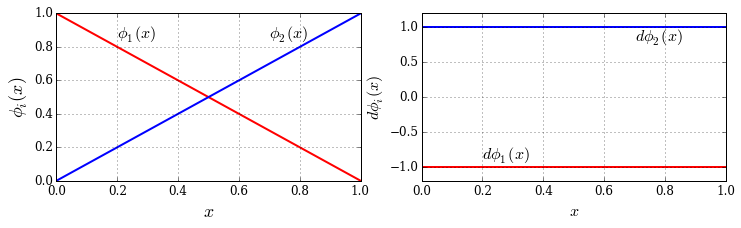

In [10]:
phi1=1-x/L
dphi1=numpy.ones(nx) 
dphi1[0 : ]=-1/L
phi2=x/L
dphi2=numpy.ones(nx)
dphi2[0 : ]=1/L
#
pyplot.figure(figsize=(12,3))
#
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel(r'$x$', fontsize=18)
pyplot.ylabel(r'$\phi_i(x)$', fontsize=18)
pyplot.tick_params(axis='both', labelsize=12)
pyplot.plot(x,phi1, 'r-', lw=2, label='$\phi_1(x)$')
pyplot.plot(x,phi2, 'b-', lw=2, label='$\phi_2(x)$')
pyplot.text(0.2, 0.85, r'$\phi_1(x)$')
pyplot.text(0.7, 0.85, r'$\phi_2(x)$');
#
pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel(r'$x$', fontsize=16)
pyplot.ylabel(r'$d\phi_i(x)$', fontsize=16)
pyplot.plot(x,dphi1, 'r-', lw=2)
pyplot.plot(x,dphi2, 'b-', lw=2)
pyplot.tick_params(axis='both', labelsize=12)
pyplot.ylim(-1.2,1.2)
pyplot.text(0.2, -0.9, r'$d\phi_1(x)$')
pyplot.text(0.7, 0.8, r'$d\phi_2(x)$');


NNow, with a defined set of interpolation functions, let´s check the meaning of the other terms of this formulation.

The approximation coefficients associated to the considered interpolation functions can be computed evaluating the displacement at both ends:
\begin{equation}
u_n(0) = a_1\underbrace{\phi_1(0)}_1 +a_2\underbrace{\phi_2(0)}_0 = a_1 = \bar{u}_1
\end{equation}
\begin{equation}
u_n(L) = a_1\underbrace{\phi_1(L)}_0+a_2\underbrace{\phi_2(L)}_1 = a_2 = \bar{u}_2
\end{equation}
Therefore, they correspond to the displacements at the ends of the bar.

The approximate normal strain is $\epsilon_n(x) = u_n'(x)$, that is,
\begin{equation}
\epsilon_n(x) = a_1\phi_1'(x)+a_2\phi_2'(x) = [\begin{array}{cc} \phi_1'(x) & \phi_2'(x)]
\end{array} \left\{ \begin{array}{c} a_1 \\ a_2 \end{array} \right\} = [B]\{a\}
\end{equation}
$[B]=\frac{1}{L}[-1\;\; 1]$ is called *strain matrix*.

For $EA=\mathrm{cte}$, the stiffness matrix is given by
\begin{eqnarray*}
[K] &=& EA \left[ \begin{array}{cc}
\int_0^L \phi'_1(x)\phi'_1(x)dx & \int_0^L \phi'_1(x)\phi'_2(x)dx \\
\int_0^L \phi'_1(x)\phi'_2(x)dx & \int_0^L \phi'_2(x)\phi'_2(x)dx
\end{array} \right] \\
&=& \frac{EA}{L} \left[ \begin{array}{rr} 1 & -1 \\ -1 & 1 \end{array} \right] \\
&=&{\int_0^L} [B]^T[D][B]Adx\;\;\;\;\;\;\;[D]=E
\end{eqnarray*}

For a distributed load $q_x(x)=q_0$, the vector of equivalent forces is
\begin{eqnarray*}
\{f\} &=& \left\{ \begin{array}{c}
\int_0^L q_0\phi_1(x)dx + P_0\phi_1(0) + P_L\phi_1(L)\\
\int_0^L q_0\phi_2(x)dx + P_0\phi_2(0) + P_L\phi_2(L)
\end{array} \right\} \\
&=& \left\{ \begin{array}{c}
q_0L/2 + P_0\\ q_0L/2 + P_L
\end{array} \right\} = \int_0^L q_x(x)[N]^Tdx + \left\{ \begin{array}{c}
P_0\\ P_L
\end{array} \right\}
\end{eqnarray*}

Finally, we obtain the system of linear equations
\begin{equation}
\frac{EA}{L} \left[ \begin{array}{rr} 1 & -1 \\ -1 & 1 \end{array} \right]
\left\{ \begin{array}{c} \bar{u}_1 \\ \bar{u}_2 \end{array} \right\} =
\left\{ \begin{array}{c}
q_oL/2 + P_0\\ q_oL/2 + P_L
\end{array} \right\}
\end{equation}

## Example: Approximate Solution for the Weak Formulation

Applying the boundary conditions of the last example to the system of equations above we have

\begin{equation}
\frac{EA}{L} \left[ \begin{array}{rr} 1 & -1 \\ -1 & 1 \end{array} \right]
\left\{ \begin{array}{c} 0 \\ \bar{u}_2 \end{array} \right\} =
\left\{ \begin{array}{c}
q_0L/2 + R\\ q_0L/2 + P
\end{array} \right\}
\end{equation}
where $R$ is the reaction force in the support at $x=0$.

Due to the boundary condition at $x=0$, $\bar{u}_1=0$, the systems of equations reduces to
\begin{equation}
\frac{EA}{L}{\bar{u}_2} = -q_0L/2 - {R},\qquad \frac{EA}{L}{\bar{u}_2} = q_0L/2 + P
\end{equation}
The first equation has two unknowns: $\bar{u}_2$ and $R$, where $\bar{u}_2$ is the displacement at $x=L$.

Solving the second equation, we have
\begin{equation}
\bar{u}_2 = \frac{L}{EA}\left(q_0L/2 + P\right)
\end{equation}

Then we can solve the first equation for $R$:
\begin{equation}
R = -(q_0L + P)
\end{equation}

The exact solution (from the last example) and the approximate solution (computed here) for this problem are
\begin{equation}
u_x(x) = \frac{1}{EA}\left(Px+q_0Lx-\frac{q_0}{2}x^2\right)\;\;
\end{equation}
\begin{equation}
u_{2}(x) =\frac{1}{EA}\left(Px+\frac{q_0L}{2}x\right)
\end{equation}

The *absolute error function* is
\begin{equation}
e(x)=|u_x(x)-u_{2}(x)| = \left|\frac{1}{EA}\left(\frac{q_0L}{2}x - \frac{q_0}{2}x^2\right)\right|
\end{equation}

The *relative error* is given by
\begin{equation}
e_r = \frac{||e(x)||}{||u_x(x)||} = \frac{\sqrt{\int_0^L e^2(x)dx}}{\sqrt{\int_0^L u_x^2(x)dx}}
\end{equation}

A comparison of the exact and approximate solutions is given below:

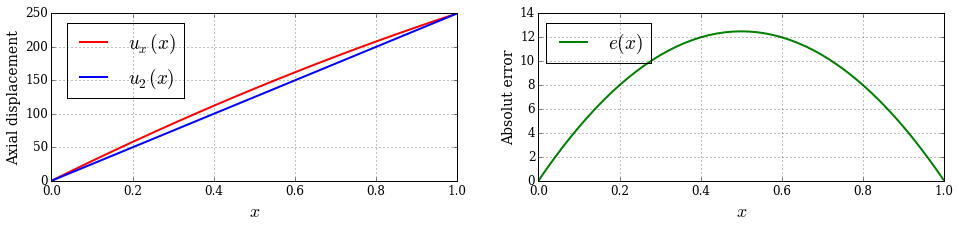

In [13]:
EAu2=(P+q0*L/2)*x
err=EAu-EAu2

pyplot.figure(figsize=(16,3))

pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel(r'$x$', fontsize=18)
pyplot.ylabel(r'Axial displacement', fontsize=14)
pyplot.tick_params(axis='both', labelsize=12)
pyplot.plot(x,EAu, 'r-', lw=2, label='$u_x(x)$')
pyplot.plot(x,EAu2, 'b-', lw=2, label='$u_2(x)$')
pyplot.legend(bbox_to_anchor=(0.35,1));
pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel(r'$x$', fontsize=18)
pyplot.ylabel(r'Absolut error', fontsize=14)
pyplot.tick_params(axis='both', labelsize=12)
pyplot.plot(x,err, 'g-', lw=2, label='$e(x)$')
pyplot.legend(bbox_to_anchor=(0.3,1));

### Computing the relative error $e_r$:

In [15]:
from scipy import integrate
from math import sqrt
mod1=numpy.zeros(nx)
mod2=numpy.zeros(nx)
for i in range(nx):
    mod1[i]=sqrt(err[i]**2)
    mod2[i]=sqrt(EAu[i]**2)
I1=integrate.simps(mod1,x)
I2=integrate.simps(mod2,x)
rerr=I1/I2  #relative error
print('The relative error of the approximate solution of the weak form is {:.4f}.'.format(rerr))

The relative error of the approximate solution of the weak form is 0.0625.


## A Bar Finite Element

Let a bar of length $L$ be divided in four segments by the introduction of three internal points as in the figure:

![barra_malha_4elems](figs/barra_malha_4elems.png)

We can associate each of the following interpolation functions $\phi_i$ to node $i$:

<figure>
<img src="figs/funcoes_1D_globais.png" alt="Global 1D functions" width="640" height="319">
</figure>

The general expression of functions $\phi_i$ is

\begin{equation}
\phi _{i}(x)=\left\{
\begin{array}{rrl}
0 &  & x\notin \left[ x_{i-1},x_{i+1}\right]  \\
\dfrac{x-x_{i-1}}{x_{i}-x_{i-1}} &  & x\in \left[ x_{i-1},x_{i}\right]  \\
-\dfrac{x-x_{i+1}}{x_{i+1}-x_{i}} &  & x\in \left[ x_{i},x_{i+1}\right]
\end{array}
\right.
\end{equation}

Note that each of those functions is nonzero on only one segment of the bar. That segment is called the *support* of $\phi_i$. Those functions are then called *compact support functions*. That very characteristic of compact supportness allows us to define the **concept of finite element**:
####*The Finite Element Method offers a sistematic procedure for building polynomial compact support shape functions.*

1. Consider the partitioned bar according to the figure above. Associate to each bar segment $i$, $i=1,\ldots,4$, the functions $\phi_{i-1}(x)$ and $\phi_i(x)$ to define the **finite element**:
<table style="width:40%; border-style:hidden">
  <tr>
    <td style="border-style:hidden; text-align:center">![funcoes_1D_elem_barra](figs/funcoes_1D_elem_barra.png)</td>	
  </tr>
</table>

2. The interpolation functions can now the written in local terms for each element as
\begin{equation}
\phi _{i-1}^{e}(x)= -\frac{x-x_i}{h_e} \qquad\text{and}\qquad
\phi _i^{e}(x)= \frac{x-x_{i-1}}{h_e}
\end{equation}

3. The approximations of the axial displacement and strain on the finite element $e$ are
\begin{equation}
u_{n}^{e}(x)=a_{i-1}^{e}\phi _{i-1}^{e}(x)+a_{i}^{e}\phi _{i}^{e}(x) = [N^e]\{a^e\}.
\end{equation}
\begin{eqnarray*}
\frac{du_{n}^{e}(x)}{dx} &=&
\left[ \begin{array}{cc} \frac{d\phi _{i-1}^{e}}{dx} & \frac{d\phi _i^{e}}{dx} \end{array} \right]
\left\{ \begin{array}{c} a_{i-1}^{e} \\ a_{i}^{e} \end{array} \right\} \\ &=&
\dfrac 1{h_e}\left[ \begin{array}{cc} -1 & 1 \end{array} \right]
\left\{ \begin{array}{c} a_{i-1}^{e} \\ a_{i}^{e} \end{array} \right\} = [{B}^{e}]\{a^{e}\}
\end{eqnarray*}

4. The element stiffness matrix is now given by 
\begin{equation}
[K^e] = \int_{x_{i-1}}^{x_i} [B^e]^T[D][B^e]Adx =
\frac{EA}{h_e} \left[ \begin{array}{rr} 1 & -1 \\ -1 & 1 \end{array} \right]
\end{equation}

5. **The superposition of local functions generates the global interpolation functions.** That superposition of local functions translate to the assembly of the global linear system of equations.

## Example: Applying the Finite Element Method to the Axially Loaded Bar

![barra_exemplo](figs/barra_exemplo.png)

Consider the same bar of the two preceeding examples as shown in the figure. We will apply the procedure described above: the domain $0\leq x\leq L$ will be divided in four segments and the steps 1 to 5 will be applied.

The next snippets of Python code implement a simple FEM procedure for solving this problem.

In [12]:
import numpy as np

## Physical data
Lb=1.0        # bar length
E  = 210e9       # Young modulus
A  = 1e-4        # cross sectional area
EA = E*A 
p0 = 100         # distributed load
Pc = 200         # concentrated load at x = L, b.c. at x = L

## FEM setup: all element with the same length
Nel   = 4        # number of elements       
Nvert = Nel+1    # number of nodes (1-D, linear interpolation)
he    = Lb/Nel   # element lenght
Ndofs = Nel+1    # number of d.o.f. (1 d.o.f. per node)

# Allocation of the stifness matrix
Kg = np.zeros((Ndofs,Ndofs))

# Allocation of the load vector
Fg = np.zeros(Ndofs)

# Allocation of the solution vector
ug = np.zeros(Ndofs)

# Allocation of incidence matrix
Incid = np.zeros((Nel,2), dtype=np.int)

# Auxiliary matrix for accessing submatrix (more comments below)
TIncid = np.zeros((2,1), dtype=np.int)

# Nodes coordinates
X = np.linspace(0, Lb, Nvert)

# Bar element stiffness matrix
Ke = (EA/he)*np.array([[1,-1],[-1,1]])

# Bar element load vector due to the distributed load p0
Fe = (p0*he/2)*np.array([1, 1])

# Assembly of global matrix and global load vector without b.c.'s
for e in range(0,Nel):
	Incid[e,:]=np.array([e,e+1])
	Fg[Incid[e,:]]=Fg[Incid[e,:]]+Fe 
	# numpy requires a column matrix to specify submatrix columns
	TIncid[:,0]=Incid[e,:] 
	# The general mechanism to access submatrices in numpy returns the
    # transpost of the submatrix. Despite all matrices being symmetric
	# I am transposing Ke to be coherent.
	Kg[Incid[e,:], TIncid] = Kg[Incid[e,:], TIncid] + np.transpose(Ke);

# Application of force b.c. at x = L
Fg[-1] = Fg[-1] + Pc

# Application of b.c. disp. condition at x = 0 (elimination of the first line
# and first column of the global system) and linear system solution for ug
ug[1:] = np.linalg.solve( Kg[1:,1:],Fg[1:] )

print('Displacement solution:',ug)

('Displacement solution:', array([  0.00000000e+00,   3.42261905e-06,   6.54761905e-06,
         9.37500000e-06,   1.19047619e-05]))


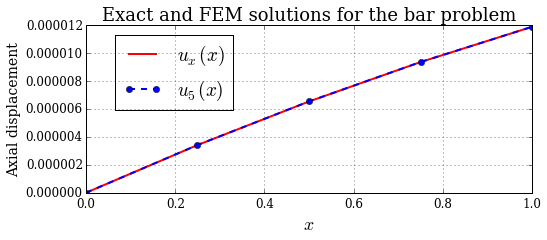

In [17]:
u=(1/EA)*EAu # exact solution of the strong form

pyplot.figure(figsize=(8,3))
pyplot.grid(True)
pyplot.xlabel(r'$x$', fontsize=18)
pyplot.ylabel(r'Axial displacement', fontsize=14)
pyplot.tick_params(axis='both', labelsize=12)
pyplot.title('Exact and FEM solutions for the bar problem', fontsize=18)
pyplot.plot(x,u, 'r-', lw=2, label='$u_x(x)$')
pyplot.plot(X,ug, 'b--', lw=2, label='$u_5(x)$', marker='o')
pyplot.legend(bbox_to_anchor=(0.35,1));

## Error Norms

### $L_2$ norm of the approximation error 

\begin{equation}
||e||_{L_2} = \sqrt{\int_\Omega (u-u_n)^2d\Omega} =
\sqrt{\sum_{e=1}^{Nel} \int_{\Omega_e} (u-u_n)^2d\Omega_e}
\end{equation}

### Energy norm of the approximation $u_n$

\begin{eqnarray*}
||u_n||_{A} &=& \sqrt{\int_\Omega EA(u_n')^2 d\Omega} =
\sqrt{\sum_{e=1}^{Nel} \int_{\Omega_e}EA (u_n')^2 d\Omega_e} \\
&=& \sqrt{\{a\}^T[K_g]\{a\}} = \sqrt{\{a\}^T\{f\}} \\
&=& \sqrt{\sum_{e=1}^{Nel}\{a_e\}^T[K_e]\{a_e\} }.
\end{eqnarray*}

In [10]:
NormEner_un = sqrt( np.dot( np.transpose(ug), np.dot(Kg, ug) ) )
print('The energy norm of the FEM solution is {:.4e}.'.format(NormEner_un))

The energy norm of the FEM solution is 5.4894e-02.


### Energy norm of the exact solution $u$

\begin{equation}
||u||_{A} = \sqrt{\int_\Omega EA(u')^2 d\Omega} =
\sqrt{\sum_{e=1}^{Nel} \int_{\Omega_e} EA(u')^2 d\Omega_e}
\end{equation}

In [11]:
du=N/EA
I3=integrate.simps(EA*du**2,x)
NormEner_uex = sqrt(I3)
print('The energy norm of the exact solution is {:.4e}.'.format(NormEner_uex))

The energy norm of the exact solution is 5.4917e-02.


### Energy norm of the relative error

\begin{equation}
||e_r||_{A} = \frac{||u||_{A} - ||u_n||_{A}}{||u||_{A}}
\end{equation}

In [12]:
Error = (NormEner_uex - NormEner_un)/NormEner_uex
print('The relative error is e = {:.4e}.'.format(Error))

The relative error is e = 4.1127e-04.


## Exercise

What is the error behavior with mesh refinement? Try to increase the mesh resolution and check the error behavior. Can you compute the mesh convergence rate?

## References

- G. E. Karniadakis, S. J. Sherwin. *Spectral/hp Element Methods for CFD*. Oxford University
Press, Oxford, 1999.
- M.L. Bittencourt. *Fully tensorial nodal and modal shape functions for triangles and tetrahedra*. IJNME, 63(2):1530-1558, 2005.
- M.L. Bittencourt, M. G. Vazquez, T. G. Vazquez. *Construction of shape functions for the h- and p- versions of the fem using tensorial product*. IJNME, 71(5):529-563, 2007.
- S. Dong, Z. Yosibash. *A parallel spectral element method for dynamic three-dimensional nonlinear
elasticity problems*. Computer & Structures, (4):61-85, 2008.
- M.L. Bittencourt, T. G. Vazquez. *Tensor-based gauss-jacobi numerical integration for high-order
mass and stiffness matrices.* IJNME, 79(5):599-638,2009.
- M.L. Bittencourt, *Análise computacional de estruturas*, Editora da UNICAMP, 2010.